In [60]:
import pandas as pd
import os
import numpy as np
import pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [61]:
path_to_dir = 'data_titanic/'

In [62]:
check_df = pd.read_csv(os.path.join(path_to_dir, 'train.csv'))

In [63]:
check_df=check_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


In [64]:
check_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [65]:
check_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [66]:
df_ = check_df.copy()

In [67]:
check_df.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


In [68]:
check_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [69]:
check_df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

## Nan


In [70]:
check_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [71]:
check_df.fillna(np.nan)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [72]:
check_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [73]:
check_df['Age'] = check_df['Age'].fillna(check_df['Age'].median())
check_df['Age'].isnull().sum()

0

In [74]:
check_df['Embarked'].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [75]:
check_df['Embarked'] = check_df['Embarked'].fillna('S')
check_df['Embarked'].isnull().sum()

0

In [76]:
check_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Приведение категориальных признаков к числовым

In [77]:
def categorical_to_num(df):
    df_num = df.drop(['Sex', 'Embarked'], axis=1)
    df_gender = pd.get_dummies(df['Sex']).drop(['female'], axis=1)
    embarked_uniq = df['Embarked'].unique()
    df_embarked = df['Embarked'].copy()
    df_embarked.replace(embarked_uniq, np.arange(embarked_uniq.shape[0]), inplace=True)
    df_num = pd.concat((df_num,  df_embarked, df_gender), axis=1)
    return df_num

In [78]:
data_prepared = categorical_to_num(check_df)

In [79]:
data_prepared.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,0,0
3,1,1,35.0,1,0,53.1000,0,0
4,0,3,35.0,0,0,8.0500,0,1


In [80]:
X = data_prepared[['Pclass','Age','SibSp','Parch','Fare','Embarked','male']]
y = data_prepared['Survived']

In [81]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    int32  
 6   male      891 non-null    uint8  
dtypes: float64(2), int32(1), int64(3), uint8(1)
memory usage: 39.3 KB


In [82]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


# Балансировка обучающей выборки

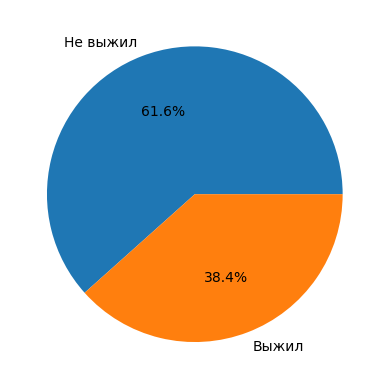

In [83]:
fig, ax = plt.subplots()
sizes = [len(y[y==0]), len(y[y==1])]
labels=['Не выжил', 'Выжил']
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

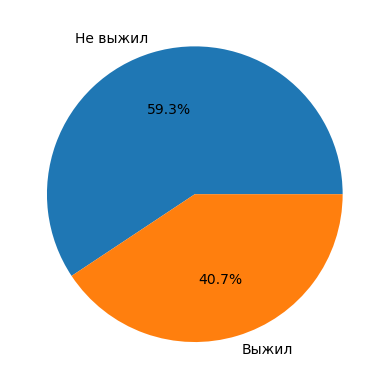

In [85]:
fig, ax = plt.subplots()
sizes = [len(y_test[y_test==0]), len(y_test[y_test==1])]
labels=['Не выжил', 'Выжил']
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

In [86]:
def sample_balancing(number_of_sample, answers):

    y_left = answers[answers==0]
    y_alive = answers[answers==1]

    y_left_random_samples = y_left.sample(n=number_of_sample//2, random_state=1)
    y_alive_random_samples = y_alive.sample(n=number_of_sample//2, random_state=1)

    y_train = pd.concat([y_left_random_samples, y_alive_random_samples], axis=0)
    train_inds = y_train.index.values
    shuffled_inds = np.random.choice(train_inds, len(train_inds), replace=False)
    all_inds = answers.index.values
    test_inds = np.setdiff1d(all_inds, train_inds)

    return shuffled_inds, test_inds

In [87]:
train_inds, test_inds = sample_balancing(number_of_sample=200,
                                         answers=y)

In [88]:
X_train = X.loc[train_inds]
y_train = y.loc[train_inds]
X_test = X.loc[test_inds]
y_test = y.loc[test_inds]

# Проверим подготовленную выборку с помощью RandomForest

In [89]:
clf = RandomForestClassifier(max_depth=8, random_state=1)
clf = clf.fit(X_train, y_train)
predict = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predict))
print("F1: ", f1_score(y_test, predict))

Accuracy:  0.7901591895803184
F1:  0.7184466019417476


# Подготовка данных

In [90]:
def scale_data(df):
    # Выделение численных признаков и их стандартизация
    numeric_features = ['Age','Fare']
    data_num = df[numeric_features].values
    scaler = StandardScaler()
    scaled_data_num = scaler.fit_transform(data_num)
    df_num = pd.DataFrame(scaled_data_num, columns=numeric_features)

    categorical_features = ['Embarked', 'male', 'Pclass']
    df_categorical = df[categorical_features]

    df_num = pd.concat((df_num, df_categorical), axis=1)
    return df_num

In [91]:
X_scaled = scale_data(X)

In [92]:
X_train = X_scaled.loc[train_inds]
y_train = y.loc[train_inds]
X_test = X_scaled.loc[test_inds]
y_test = y.loc[test_inds]

In [93]:
clf = RandomForestClassifier(max_depth=8, random_state=1)
clf = clf.fit(X_train, y_train)
predict = clf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, predict))
print("F1: ", f1_score(y_test, predict))

Accuracy:  0.8219971056439942
F1:  0.7442827442827443


#### Результат улучшился. Сохраняем результат, пытаемся улучшить дальше


In [94]:
saved_clf = clf

# Анализ матрицы корреляци

In [95]:
data_scaled = pd.concat((X_scaled, y), axis=1)

In [96]:
data_scaled

,Age,Fare,Embarked,male,Pclass,Survived
0,-0.565736,-0.502445,0,1,3,0
1,0.663861,0.786845,1,0,1,1
2,-0.258337,-0.488854,0,0,3,1
3,0.433312,0.420730,0,0,1,1
4,0.433312,-0.486337,0,1,3,0
...,...,...,...,...,...,...
886,-0.181487,-0.386671,0,1,2,0
887,-0.796286,-0.044381,0,0,1,1
888,-0.104637,-0.176263,0,0,3,0
889,-0.258337,-0.044381,1,1,1,1


In [97]:
corr_matrix = data_scaled.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Age,Fare,Embarked,male,Pclass,Survived
Age,1.000000,0.096688,0.009165,0.081163,0.339898,0.064910
Fare,0.096688,1.000000,0.062142,0.182333,0.549500,0.257307
Embarked,0.009165,0.062142,1.000000,0.116569,0.045702,0.106811
male,0.081163,0.182333,0.116569,1.000000,0.131900,0.543351
Pclass,0.339898,0.549500,0.045702,0.131900,1.000000,0.338481
Survived,0.064910,0.257307,0.106811,0.543351,0.338481,1.000000


## Вытащим признаки с коэффициентом корреляции (с Exited) выше 0.1

In [98]:
good_cols = list((corr_matrix[corr_matrix['Survived'] > 0.1]).drop('Survived').index.values)
bad_cols = list((corr_matrix[corr_matrix['Survived'] <= 0.1]).index.values)

In [99]:
good_cols

['Fare', 'Embarked', 'male', 'Pclass']

In [100]:
X_scaled_with_good_cols = X_scaled[good_cols]

In [101]:
X_train = X_scaled_with_good_cols.loc[train_inds]
y_train = y.loc[train_inds]
X_test = X_scaled_with_good_cols.loc[test_inds]
y_test = y.loc[test_inds]

In [102]:
clf = RandomForestClassifier(max_depth=8, random_state=1)
clf = clf.fit(X_train, y_train)
predict = clf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, predict))
print("F1: ", f1_score(y_test, predict))

Accuracy:  0.7916063675832128
F1:  0.7037037037037037


### Качество метрики ухудшилось, дальше будем использовать соххраненную лучшую  копию

# Дополнительный анализ данных

In [103]:
print("средний возраст выживших: ", check_df[check_df['Survived'] == 1]['Age'].mean())
print("средний возраст погибших: ", check_df[check_df['Survived'] == 0]['Age'].mean())

средний возраст выживших:  28.29143274853801
средний возраст погибших:  30.028233151183972


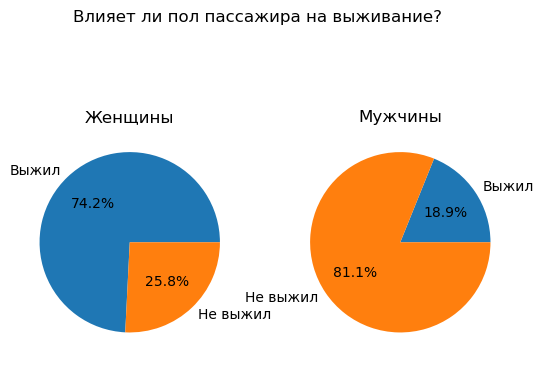

In [104]:
fig, ax = plt.subplots(nrows=1, ncols=2)

sizes = [len(data_prepared[(data_prepared['male']==0)*(data_prepared['Survived']==1)]),
         len(data_prepared[(data_prepared['male']==0)*(data_prepared['Survived']==0)])]
labels = ['Выжил', 'Не выжил']
ax[0].pie(sizes, labels=labels, autopct='%1.1f%%')
ax[0].set_title('Женщины')

sizes = [len(data_prepared[(data_prepared['male']!=0)*(data_prepared['Survived']==1)]),
         len(data_prepared[(data_prepared['male']!=0)*(data_prepared['Survived'] ==0)])]
ax[1].pie(sizes, labels=labels, autopct='%1.1f%%')
ax[1].set_title('Мужчины')
fig.suptitle('Влияет ли пол пассажира на выживание?')
plt.show()

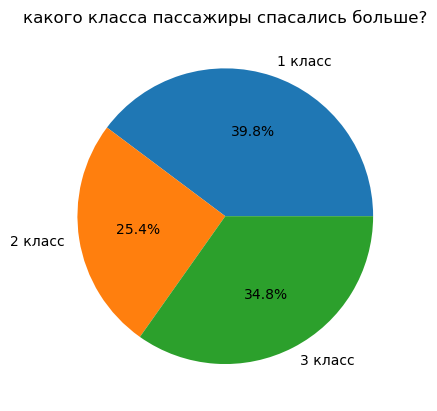

In [105]:
fig, ax = plt.subplots()

sizes = [len(data_prepared[(data_prepared['Pclass']==1)*(data_prepared['Survived']==1)]),
         len(data_prepared[(data_prepared['Pclass']==2)*(data_prepared['Survived']==1)]),
         len(data_prepared[(data_prepared['Pclass']==3)*(data_prepared['Survived']==1)])]
labels = ['1 класс', '2 класс', '3 класс']
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.set_title('какого класса пассажиры спасались больше?')
plt.show()

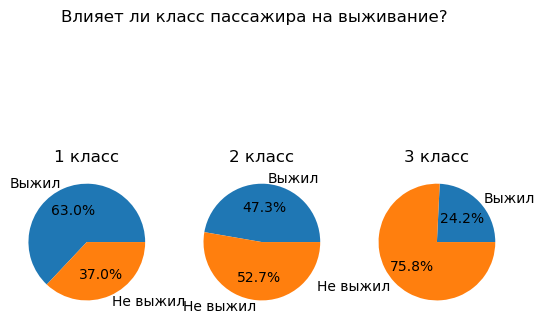

In [106]:
fig, ax = plt.subplots(nrows=1, ncols=3)

sizes = [len(data_prepared[(data_prepared['Pclass']==1)*(data_prepared['Survived']==1)]),
         len(data_prepared[(data_prepared['Pclass']==1)*(data_prepared['Survived']==0)]),]
labels = ['Выжил', 'Не выжил']
ax[0].pie(sizes, labels=labels, autopct='%1.1f%%')
ax[0].set_title('1 класс')

sizes = [len(data_prepared[(data_prepared['Pclass']==2)*(data_prepared['Survived']==1)]),
         len(data_prepared[(data_prepared['Pclass']==2)*(data_prepared['Survived']==0)]),]
labels = ['Выжил', 'Не выжил']
ax[1].pie(sizes, labels=labels, autopct='%1.1f%%')
ax[1].set_title('2 класс')

sizes = [len(data_prepared[(data_prepared['Pclass']==3)*(data_prepared['Survived']==1)]),
         len(data_prepared[(data_prepared['Pclass']==3)*(data_prepared['Survived']==0)]),]
labels = ['Выжил', 'Не выжил']
ax[2].pie(sizes, labels=labels, autopct='%1.1f%%')
ax[2].set_title('3 класс')
fig.suptitle('Влияет ли класс пассажира на выживание?')
plt.show()

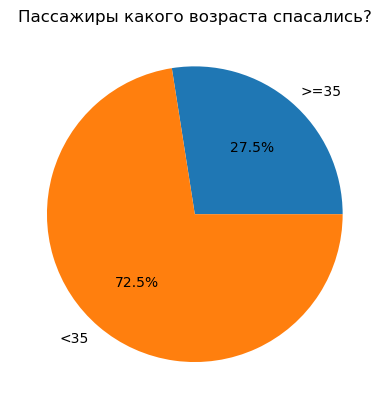

In [107]:
fig, ax = plt.subplots()

sizes = [len(check_df[(check_df['Age']>=35)*(check_df['Survived']==1)]),
         len(check_df[(check_df['Age']<35)*(check_df['Survived']==1)])]
labels = ['>=35', '<35']
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.set_title('Пассажиры какого возраста спасались?')
plt.show()

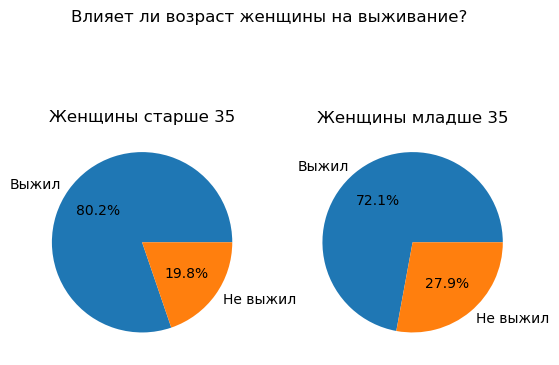

In [108]:
fig, ax = plt.subplots(nrows=1, ncols=2)

sizes = [len(check_df[(check_df['Age']>=35)*(check_df['Survived']==1)*(data_prepared['male']==0)]),
         len(check_df[(check_df['Age']>=35)*(check_df['Survived']==0)*(data_prepared['male']==0)])]
labels = ['Выжил', 'Не выжил']
ax[0].pie(sizes, labels=labels, autopct='%1.1f%%')
ax[0].set_title('Женщины старше 35')


sizes = [len(check_df[(check_df['Age']<35)*(check_df['Survived']==1)*(data_prepared['male']==0)]),
         len(check_df[(check_df['Age']<35)*(check_df['Survived']==0)*(data_prepared['male']==0)])]
labels = ['Выжил', 'Не выжил']
ax[1].pie(sizes, labels=labels, autopct='%1.1f%%')
ax[1].set_title('Женщины младше 35')
fig.suptitle('Влияет ли возраст женщины на выживание?')
plt.show()

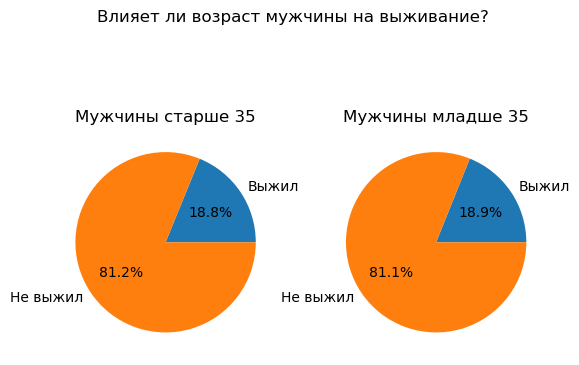

In [109]:
fig, ax = plt.subplots(nrows=1, ncols=2)

sizes = [len(check_df[(check_df['Age']>=35)*(check_df['Survived']==1)*(data_prepared['male']==1)]),
         len(check_df[(check_df['Age']>=35)*(check_df['Survived']==0)*(data_prepared['male']==1)])]
labels = ['Выжил', 'Не выжил']
ax[0].pie(sizes, labels=labels, autopct='%1.1f%%')
ax[0].set_title('Мужчины старше 35')


sizes = [len(check_df[(check_df['Age']<35)*(check_df['Survived']==1)*(data_prepared['male']==1)]),
         len(check_df[(check_df['Age']<35)*(check_df['Survived']==0)*(data_prepared['male']==1)])]
labels = ['Выжил', 'Не выжил']
ax[1].pie(sizes, labels=labels, autopct='%1.1f%%')
ax[1].set_title('Мужчины младше 35')
fig.suptitle('Влияет ли возраст мужчины на выживание?')
plt.show()

## Повторим всё для тестовой выборки

In [110]:
test_df = pd.read_csv(os.path.join(path_to_dir, 'test.csv'))
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [111]:
test_df.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [112]:
test_df=test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [113]:
test_df.describe(include='all')

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418,332.000000,418.000000,418.000000,417.000000,418
unique,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,266,NaN,NaN,NaN,NaN,270
mean,2.265550,NaN,30.272590,0.447368,0.392344,35.627188,NaN
std,0.841838,NaN,14.181209,0.896760,0.981429,55.907576,NaN
min,1.000000,NaN,0.170000,0.000000,0.000000,0.000000,NaN
25%,1.000000,NaN,21.000000,0.000000,0.000000,7.895800,NaN
50%,3.000000,NaN,27.000000,0.000000,0.000000,14.454200,NaN
75%,3.000000,NaN,39.000000,1.000000,0.000000,31.500000,NaN


In [114]:
test_df.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [115]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())
test_df['Fare'].isnull().sum()

0

In [116]:
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

In [117]:
test_df = categorical_to_num(test_df)
test_df.isna().sum()
X_scaled = scale_data(test_df)

In [118]:
X = test_df[['Pclass',
                   'Age',
                   'Fare',
                   'Embarked',
                   'male'
                   ]]

predict = saved_clf.predict(X_scaled)

predict

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,